# **Import of the Data files and basic Libraries**

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

# other imports will be made when needed later in the code

In [30]:
bank = pd.read_csv('Data/bank.csv', sep=';')
bank_full = pd.read_csv('Data/bank-full.csv', sep=';')

bank_add = pd.read_csv('Data/bank-additional.csv', sep=';')
bank_add_full = pd.read_csv('Data/bank-additional-full.csv', sep=';')

# **Inspecting the Datasets**

In [31]:
# In the code below we examine which dataset we will use for the study

In [32]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [33]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [35]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
print('The shape of bank is         : ', bank.shape)
print('The shape of bank_full is    : ',bank_full.shape)
print('The shape of bank_add is     : ',bank_add.shape)
print('The shape of bank_add_full is: ',bank_add_full.shape)

The shape of bank is         :  (4521, 17)
The shape of bank_full is    :  (45211, 17)
The shape of bank_add is     :  (4119, 21)
The shape of bank_add_full is:  (41188, 21)


In [37]:
# The biggest Dataset is the Bank_full but the one with the most independent variables is Bank_add_full. 
# In order to get the best performing prediction model we decided to choose Bank_add_full as our base dataset for this study

## Check the dataset for Missing Values

In [38]:
bank_add_full.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [39]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
bank_add_full.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
# As you can also see, there are no missing values.
# therefore the dataset is complete and no further cleaning has to be done

# **Transform the Dataset**

## Change the Classification to a Binary 

In [42]:
clean_bank_add_full = pd.get_dummies(bank_add_full, drop_first=True)
clean_bank_add_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [43]:
clean_bank_add_full.keys()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [44]:
# After inspecting the different variables, we observed that not all "months" & "day_of_week" were not present in the dataset
# We decided this missing values are not relevant for the scope of this research

## Drop duration

In [45]:
# according to the researchers it is usefull to drop duration
clean_bank_add_full = clean_bank_add_full.drop('duration', axis=1)

In [46]:
clean_bank_add_full.keys()

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_

## Next we define the X & Y

In [47]:
# We define the x Table and y Table
    #x Table contains all variables (without the outcome)
    #y Table only contains the Outcome 0 or 1 (=Success)
x = clean_bank_add_full.drop('y_yes', axis=1)       # independant features
y = clean_bank_add_full['y_yes']                    # dependent variable

## We split the Dataset into Train (0.7) / Test (0.3)

In [75]:
# As we go with the logistic regression model without tuning parameter we decided to split the data only in train & test.

from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

train_x_val, validation_x, train_y_val, validation_y = train_test_split(train_x,train_y, test_size=(0.2/0.7), random_state=42)

In [49]:
train_x.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39075,29,3,999,1,-3.0,92.713,-33.0,0.709,5023.5,0,...,0,0,0,0,1,0,0,0,0,0
34855,29,4,999,0,-1.8,92.893,-46.2,1.250,5099.1,0,...,1,0,0,0,0,0,0,0,1,0
7107,45,2,999,0,1.1,93.994,-36.4,4.860,5191.0,1,...,1,0,0,0,0,1,0,0,1,0
31614,34,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,0,...,1,0,0,0,0,1,0,0,0,0
34878,32,9,999,0,-1.8,92.893,-46.2,1.250,5099.1,0,...,1,0,0,0,0,0,0,0,1,0


In [50]:
#Quick check if the split is correct:
print("Shape of train_x             : "+str(train_x.shape))
print("Shape of test_x              : "+str(test_x.shape))
print("Shape of train_y             : "+str(train_y.shape))
print("Shape of test_y              : "+str(test_y.shape))
print('')
print("Lenght of Dataset            : ", len(x))
print("Percentage of Train          : ", '{:.2f}'.format(len(train_x)/len(x)*100), '%')
print("Percentage of Test           : ", '{:.2f}'.format(len(test_x)/len(x)*100), '%')


Shape of train_x             : (28831, 52)
Shape of test_x              : (12357, 52)
Shape of train_y             : (28831,)
Shape of test_y              : (12357,)

Lenght of Dataset            :  41188
Percentage of Train          :  70.00 %
Percentage of Test           :  30.00 %


## Linear Regression - OLS

In [51]:
#Start with OLS --> No subset selection, because both regularization methods are to be applied (Lasso is therefore an indirect subset selection)
xcon = sm.add_constant(train_x)
model_1 = sm.OLS(train_y, xcon)
results = model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_yes   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:16:36   Log-Likelihood:                -4206.8
No. Observations:               28831   AIC:                             8518.
Df Residuals:                   28779   BIC:                             8948.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -23.4651      4.000     -5.866      0.000     -31.306     -15.625
age                           -9.685e-05      0.000     -0.470      0.638      -0.001       0.000
campaign                         -0.0023      0.001     -3.776      0.000      -0.004      -0.001
pdays                            -0.0002   3.11e-05     -7.687      0.000      -0.000      -0.000
previous                         -0.0104      0.008     -1.278      0.201      -0.026       0.006
emp.var.rate                     -0.2088      0.016    -13.123      0.000      -0.240      -0.178
cons.price.idx                    0.2571      0.027      9.665      0.000       0.205       0.309
cons.conf.idx                     0.0037      0.001      4.037      0.000       0.002       0.006
euribor3m                         0.0836      0.013      6.207      0.000       0.057       0.110
nr.employed                   -7.382e-05      0.000     -0.230      0.818      -0.001       0.001
job_blue-collar                  -0.0083      0.006     -1.342      0.180      -0.020       0.004
job_entrepreneur                 -0.0071      0.010     -0.734      0.463      -0.026       0.012
job_housemaid                    -0.0158      0.011     -1.404      0.160      -0.038       0.006
job_management                   -0.0073      0.007     -1.009      0.313      -0.021       0.007
job_retired                       0.0189      0.010      1.863      0.063      -0.001       0.039
job_self-employed                -0.0116      0.009     -1.226      0.220      -0.030       0.007
job_services                     -0.0081      0.007     -1.223      0.221      -0.021       0.005
job_student                       0.0210      0.012      1.705      0.088      -0.003       0.045
job_technician                    0.0019      0.006      0.320      0.749      -0.010       0.013
job_unemployed                    0.0004      0.011      0.039      0.969      -0.022       0.022
job_unknown                      -0.0291      0.019     -1.535      0.125      -0.066       0.008
marital_married                   0.0031      0.005      0.563      0.574      -0.008       0.014
marital_single                    0.0036      0.006      0.579      0.563      -0.009       0.016
marital_unknown                   0.0213      0.039      0.542      0.588      -0.056       0.098
education_basic.6y                0.0046      0.009      0.518      0.605      -0.013       0.022
education_basic.9y               -0.0048      0.007     -0.681      0.496      -0.019       0.009
education_high.school            -0.0015      0.007     -0.209      0.835      -0.016       0.013
education_illiterate              0.1165      0.085      1.375      0.169      -0.050       0.283
education_professional.course    -0.0019     

In [52]:
# To double check the OLS Regression we also implemented the LinearRegression from Sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)

# check how good the train model is on the test data (how it works on data which is not in the "data set")
print(reg.score(test_x, test_y))
print(reg.intercept_)
print(reg.coef_)



0.20792169269853233
-23.46512306103276
[-9.68511910e-05 -2.31620535e-03 -2.39278690e-04 -1.03875595e-02
 -2.08835963e-01  2.57083324e-01  3.74767299e-03  8.35742143e-02
 -7.38245078e-05 -8.26501271e-03 -7.09283903e-03 -1.58056182e-02
 -7.28582407e-03  1.89103103e-02 -1.16320946e-02 -8.14253566e-03
  2.10182300e-02  1.89137722e-03  4.43077001e-04 -2.91244857e-02
  3.06695210e-03  3.62698915e-03  2.13046757e-02  4.58715997e-03
 -4.79843109e-03 -1.51996683e-03  1.16486652e-01 -1.85280523e-03
  9.56837628e-03 -2.41239930e-03 -1.10551015e-02 -3.76182480e-02
 -1.71363532e-03 -4.02211386e-03 -1.71363532e-03  4.16204950e-03
 -7.55381136e-02  8.55987535e-02  6.56588684e-02  2.10262346e-02
 -6.72899932e-02  2.48116376e-01 -4.48136815e-02 -5.26543136e-02
  5.75581221e-03  1.88171724e-02 -1.61949158e-02  1.25561483e-02
  5.61533607e-03  1.26801945e-02  4.80749493e-02  1.26592957e-01]


## Linear Regression - Ridge / Lasso

In [53]:
#OLS mit Ridge without Change of Lambda
model1 = OLS(train_y, xcon)
result1 = model1.fit_regularized(alpha=1., L1_wt=0) #Ridge
print(result1.params)

[ 2.37912187e-04  2.95729883e-04 -2.69059291e-03 -4.07735385e-04
 -2.21685779e-03 -1.71638062e-02  2.42790688e-02  4.81808251e-03
 -1.90406237e-02 -2.90549251e-04 -3.37873364e-03 -3.08241912e-04
 -3.16547399e-04 -2.26121291e-04  1.75868734e-03 -2.03468405e-04
 -1.22563995e-03  1.40451042e-03  5.28800430e-04  2.31598015e-04
 -1.93742319e-04 -1.91560030e-03  2.64761093e-03  1.28347007e-05
 -4.57626547e-04 -1.97655275e-03 -7.32224985e-04  4.46149621e-05
  4.74688407e-05  3.69798565e-03  2.35216175e-04 -3.88844238e-03
 -4.47779116e-06 -9.84056573e-06 -2.53844822e-04 -9.84056573e-06
  3.10060952e-04 -7.54719278e-03  6.49088232e-05  4.47720819e-04
  5.44734009e-03  2.32680178e-03  3.14607536e-03 -1.42809774e-02
 -1.33199085e-03  1.78080858e-03  7.83134786e-04 -2.41987005e-03
  1.89308754e-03  6.62579387e-04  1.10673677e-03  3.20443085e-03
  5.66210182e-04]
const                            0.000000
age                              0.000000
campaign                         0.000000
pdays      

In [68]:
#OLS mit Lasso without Change of Lambda
model2 = OLS(train_y, xcon)
result2 = model1.fit_regularized(alpha=0, L1_wt=1) #lasso
print(result2.params)

const                            0.026040
age                              0.000181
campaign                        -0.003374
pdays                           -0.000059
previous                         0.053028
emp.var.rate                    -0.056345
cons.price.idx                   0.000623
cons.conf.idx                    0.001868
euribor3m                        0.004986
nr.employed                      0.000008
job_blue-collar                 -0.011662
job_entrepreneur                -0.012857
job_housemaid                   -0.013217
job_management                  -0.009781
job_retired                      0.033346
job_self-employed               -0.014734
job_services                    -0.009150
job_student                      0.048934
job_technician                  -0.000255
job_unemployed                   0.004448
job_unknown                     -0.022776
marital_married                  0.005559
marital_single                   0.007416
marital_unknown                  0

In [77]:
#Validation for Lambda
from sklearn.linear_model import RidgeCV
lambdas = np.arange(1, 10, 0.01) #First between 1-10
rr = RidgeCV(alphas=lambdas, fit_intercept=True, store_cv_values=True)
rr.fit(train_x_val, train_y_val)
betaRidge = np.append(rr.intercept_,rr.coef_)
betaRidge
yhat = np.dot(sm.add_constant(validation_x),betaRidge)
yhat1 = rr.predict(validation_x)
validationMSE = np.mean((yhat-validation_y)**2)

print("Optimal tuning parameter using cross validation: ", rr.alpha_)
print("Ridge Estimates using optimal tuning parameter : ", betaRidge)
print("Validation MSE: ", validationMSE)

Optimal tuning parameter using cross validation:  7.390000000000006
Ridge Estimates using optimal tuning parameter :  [-2.27079960e+01 -6.00049019e-05 -2.26483679e-03 -3.08062302e-04
 -1.97382195e-02 -1.97815544e-01  2.46248089e-01  4.14793537e-03
  7.29209476e-02  1.38183714e-06 -4.82104141e-03 -1.80501411e-04
 -1.51786038e-02 -6.08908986e-03  3.22795531e-02 -1.39076875e-02
 -7.81792156e-03  3.00751552e-02  5.82461158e-04  1.25084913e-02
 -2.24030379e-02  9.70866209e-04 -1.11809857e-03  2.10596383e-02
  8.91560434e-04 -8.54959309e-03 -1.24029355e-03  6.29203133e-02
  2.56001159e-03  1.09433231e-02 -9.84933603e-03 -8.69500167e-03
 -6.83845595e-03 -5.10086343e-03 -3.11510688e-03 -5.10086343e-03
  4.92103342e-03 -6.40223554e-02  8.69205990e-02  8.96159022e-02
  2.46972938e-02 -7.10041292e-02  2.41237270e-01 -4.84591407e-02
 -4.62739033e-02 -1.08514134e-02  1.69999128e-02 -1.24176700e-02
  1.29727713e-02  4.10287553e-03  1.79867258e-02  3.02779242e-02
  7.45923345e-02]
Validation MSE:  0.

In [78]:
#Ridge with Change of Lambda
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_reg = Ridge(alpha=rr.alpha_, fit_intercept=True, solver='sparse_cg')

ridge_reg.fit(test_x, test_y)
print("Ridge Estimates from package: ",np.append(ridge_reg.intercept_,ridge_reg.coef_))


Ridge Estimates from package:  [ 8.71878507e+00  1.09299890e-03 -8.25058675e-04 -3.17988489e-04
 -1.56905899e-02  1.07903126e-02  1.75972688e-02  4.45031111e-03
  9.32894437e-03 -1.90004647e-03 -1.82377902e-02 -1.36600604e-03
  8.55321218e-04 -1.13250314e-03  9.51528868e-03  1.57246092e-03
 -5.24016964e-03  6.19716197e-03 -1.36004145e-04 -3.46394550e-04
  7.22253901e-04 -1.30437058e-02  1.52104026e-02  3.51834906e-04
 -2.45188790e-03 -9.46187515e-03  3.41167507e-04  1.39907400e-04
  2.35652590e-03  7.05447651e-03  5.27485882e-03 -1.56259059e-02
 -1.54979179e-05 -1.23308509e-03  1.37423371e-03 -1.23308509e-03
 -6.78029213e-03 -2.68108025e-02  6.93152601e-03  2.54487710e-03
  3.09429350e-02  1.47874303e-02  1.06686279e-02 -6.78295335e-02
 -1.75070404e-03  1.21681787e-03 -2.24624638e-04 -1.12802247e-02
 -8.26153205e-05  3.42755937e-03  7.39869340e-03  1.44011517e-02
  2.56950476e-03]


In [82]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

lasso_reg = linear_model.Lasso(alpha=rr.alpha_, fit_intercept=True)

lasso_reg.fit(test_x, test_y)
print("Lasso Estimates from package:", np.append(lasso_reg.intercept_,lasso_reg.coef_))

#because IOO a Linear Ridge Regression doesnt make any sense (higher than one and lower than 0 = non-sensical Predicitions), we will use for further analysis a Logistic Regression 

Lasso Estimates from package: [ 4.28553822e-01  0.00000000e+00 -0.00000000e+00 -3.29064332e-04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


## Logit

0.9002184996358339


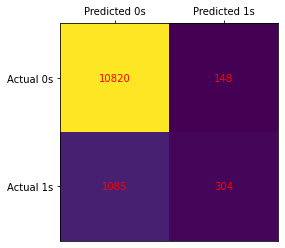

Fraction of correct predictions:  0.9002184996358339


In [88]:
#Logit without Penalty
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C = 9999999999,  solver='liblinear')      # Default penalty = L2 = ridge (squared error / close to zero)
model.fit(train_x, train_y)
print(model.score(test_x, test_y))

from sklearn.metrics import classification_report, confusion_matrix
n = len(test_x)

prob = model.predict_proba(test_x)
pred = model.predict(test_x)
y_pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(test_y, y_pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)


In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
print('MSE          : ',mse)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity  : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity  : ', specificity1)

MSE          :  0.09978150036416605
Sensitivity  :  0.986506199854121
Specificity  :  0.21886249100071994


0.9002994254268836


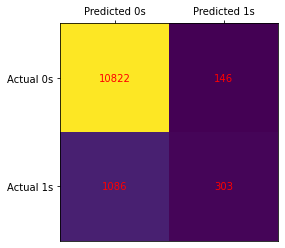

Fraction of correct predictions:  0.9002994254268836


In [90]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# First we check for the logit with L2 (ridge)

from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear')      # Default penalty = L2 = ridge (squared error / close to zero)
model.fit(train_x, train_y)
print(model.score(test_x, test_y))


from sklearn.metrics import classification_report, confusion_matrix
n = len(test_x)

prob = model.predict_proba(test_x)
pred = model.predict(test_x)
y_pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(test_y, y_pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)


In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
print('MSE          : ',mse)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity  : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity  : ', specificity1)

MSE          :  0.09970057457311646
Sensitivity  :  0.9866885485047411
Specificity  :  0.21814254859611232


c:\Users\Laurin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8968196164117505


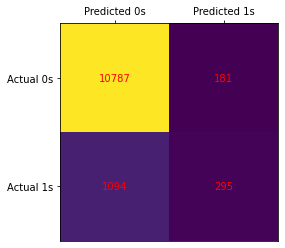

Fraction of correct predictions:  0.8968196164117505


In [92]:
# Second we test logit with L1 (lasso)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l1", solver='saga', C=2, fit_intercept=True)
model.fit(train_x, train_y)
print(model.score(test_x, test_y))

from sklearn.metrics import classification_report, confusion_matrix
n = len(test_x)

prob = model.predict_proba(test_x)
pred = model.predict(test_x)
y_pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(test_y, y_pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
print('MSE          : ',mse)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity  : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity  : ', specificity1)

MSE          :  0.10318038358824957
Sensitivity  :  0.9834974471188913
Specificity  :  0.21238300935925125


## Analysis with different P & C

0.9002994254268836


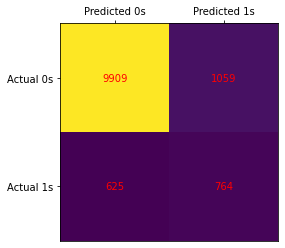

Fraction of correct predictions:  0.863720967872461


In [61]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear')      # Default penalty = L2 = ridge (squared error / close to zero)
model.fit(train_x, train_y)
print(model.score(test_x, test_y))


from sklearn.metrics import classification_report, confusion_matrix
n = len(test_x)

prob = model.predict_proba(test_x)
pred = model.predict(test_x)
y_pred = 1*(prob[:,1] > 0.2)
cm = confusion_matrix(test_y, y_pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
print('MSE          : ',mse)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity  : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity  : ', specificity1)

MSE          :  0.13627903212753906
Sensitivity  :  0.9034463894967177
Specificity  :  0.5500359971202304


## In the end we decided to go with the logistic regression with the p value of 0.2
## The reason is...

In [63]:
#Auswertung aller Modele und direkter Vergleich